In [1]:
import matplotlib.dates as dts
import numpy as np
import runProcs
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

# # This program requires the Penn World Tables data file: pwt91.xlsx
# # available at https://pwt.sas.upenn.edu/

In [2]:
# 0. Setup

# # 0.1 general plot settings

# font = {'weight' : 'bold',
#         'size'   : 15}
# plt.rc('font', **font)
# plt.rcParams['xtick.major.pad']='8'
# plt.rcParams['ytick.major.pad']='8'


# 0.2 Formatter for inserting commas in y axis labels with magnitudes in the thousands

def func(x, pos):  # formatter function takes tick label and tick position
   s = '{:0,d}'.format(int(x))
   return s

y_format = plt.FuncFormatter(func)  # make formatter

# 0.3 format the x axis ticksticks
years2,years4,years5,years10,years15= dts.YearLocator(2),dts.YearLocator(4),dts.YearLocator(5),dts.YearLocator(10),dts.YearLocator(15)


# 0.4 y label locator for vertical axes plotting gdp
majorLocator_y   = plt.MultipleLocator(3)
majorLocator_shares   = plt.MultipleLocator(0.2)

In [3]:
# 1. Import data
pwt = pd.read_excel('../xslx/pwt91.xlsx',sheet_name='Data')

In [4]:
# 2. lists of countries, codes, and years
year0 = 1960

country_codes=[]
countries = []
years = []
for code in pwt['countrycode']:
    if code not in country_codes:
        country_codes.append(code)
        
for country in pwt['country']:
    if country == u"Côte d'Ivoire":
        country = u"Cote d'Ivoire"
    if country not in countries:
        countries.append(country)
        
for year in pwt['year']:
    if year not in years:
        years.append(year)

year0= years.index(year0)
len(years)

68

In [5]:
# 3. Create deatasets

# 3.1 income and population datasets
income_dict = {}
income_pc_dict = {}
pop_dict = {}
count=0
for i,code in enumerate(country_codes):
    income = pwt.loc[pwt['countrycode'] == code]['cgdpe'].values
    pop = pwt.loc[pwt['countrycode'] == code]['pop'].values
    income_pc = income/pop
    if code =='ZWE':
        income = income[0:len(years)]
        income_pc = income_pc[0:len(years)]
        pop = pop[0:len(years)]
    if True not in [np.isnan(x) for x in income_pc[year0:]]:
        income_dict[countries[i]+' - '+code] = income[year0:].tolist()
        income_pc_dict[countries[i]+' - '+code] = income_pc[year0:].tolist()
        pop_dict[countries[i]+' - '+code] = pop[year0:].tolist()
        count+=1

income = pd.DataFrame(income_dict,index=years[year0:])
income_pc = pd.DataFrame(income_pc_dict,index=years[year0:])

income_pc = np.round(income_pc,5)
income_pcLog = np.round(np.log(income_pc),5)

# totalPop = pop.sum(axis=1)
# totalIncome = income.sum(axis=1)
# totalincome_pc = totalIncome/totalPop

print(count,' countries in the sample.')

income_pc.to_csv('../csv/cross_country_income_per_capita.csv',index_label='year')
income_pcLog.to_csv('../csv/cross_country_income_per_capita_log.csv',index_label='year')

# 3.2 Other datasets

def create_data_set(pwtCode='cgdpe',per_capita=True,per_worker=False,file_name='../csv/test'):
    
    new_dict = {}
    new_pc_dict = {}
    new_pw_dict = {}
    pop_dict = {}
    employed_dict = {}

    for i,code in enumerate(country_codes):
        income = pwt.loc[pwt['countrycode'] == code]['cgdpe'].values
        pop = pwt.loc[pwt['countrycode'] == code]['pop'].values
        employed = pwt.loc[pwt['countrycode'] == code]['emp'].values
        
        income_pc = income/pop
        new = pwt.loc[pwt['countrycode'] == code][pwtCode].values
        new_pc = new/pop
        new_pw = new/employed
        
        if code =='ZWE':
            income = income[0:len(years)]
            income_pc = income_pc[0:len(years)]
            new = new[0:len(years)]
            new_pc = new_pc[0:len(years)]
            new_pw = new_pw[0:len(years)]
            pop = pop[0:len(years)]
            employed = employed[0:len(years)]
        if True not in [np.isnan(x) for x in income_pc[year0:]]:
            new_dict[countries[i]+' - '+code] = new[year0:].tolist()
            new_pc_dict[countries[i]+' - '+code] = new_pc[year0:].tolist()
            new_pw_dict[countries[i]+' - '+code] = new_pw[year0:].tolist()
    
    new = pd.DataFrame(new_dict,index=years[year0:])
    new_pc = pd.DataFrame(new_pc_dict,index=years[year0:])
    new_pw = pd.DataFrame(new_pw_dict,index=years[year0:])
    
    new = np.round(new,5)
    new_pc = np.round(new_pc,5)
    new_pw = np.round(new_pw,5)

    if per_capita == True:
        new_pc.to_csv(file_name+'.csv',index_label='year')
        return new_pc
    elif per_worker == True:
        new_pw.to_csv(file_name+'.csv',index_label='year')
        return new_pw
    else:
        new.to_csv(file_name+'.csv',index_label='year')    
        return new

income_pw = create_data_set(pwtCode='cgdpe',per_capita=False,per_worker=True,file_name='../csv/cross_country_income_per_worker')
output_pw = create_data_set(pwtCode='cgdpo',per_capita=False,per_worker=True,file_name='../csv/cross_country_output_per_worker')
output_pc = create_data_set(pwtCode='cgdpo',per_capita=True,per_worker=False,file_name='../csv/cross_country_output_per_capita')
consumption_pc = create_data_set(pwtCode='ccon',per_capita=True,per_worker=False,file_name='../csv/cross_country_consumption_per_capita')
physical_capital_pw = create_data_set(pwtCode='ck',per_capita=False,per_worker=True,file_name='../csv/cross_country_physical_capital_per_worker')
physical_capital_pc = create_data_set(pwtCode='ck',per_capita=True,per_worker=False,file_name='../csv/cross_country_physical_capital_per_capita')
human_capital_pc = create_data_set(pwtCode='hc',per_capita=False,per_worker=False,file_name='../csv/cross_country_human_capital_per_capita')
employed = create_data_set(pwtCode='hc',per_capita=False,per_worker=False,file_name='../csv/cross_country_employed')
hours = create_data_set(pwtCode='avh',per_capita=False,per_worker=False,file_name='../csv/cross_country_hours')
popluation = create_data_set(pwtCode='pop',per_capita=False,per_worker=False,file_name='../csv/cross_country_population')
savingRate = create_data_set(pwtCode='csh_i',per_capita=False,per_worker=False,file_name='../csv/cross_country_saving_rate')
laborShare = create_data_set(pwtCode='labsh',per_capita=False,per_worker=False,file_name='../csv/cross_country_labor_share')
depreciation = create_data_set(pwtCode='delta',per_capita=False,per_worker=False,file_name='../csv/cross_country_depreciation_rate')

111  countries in the sample.


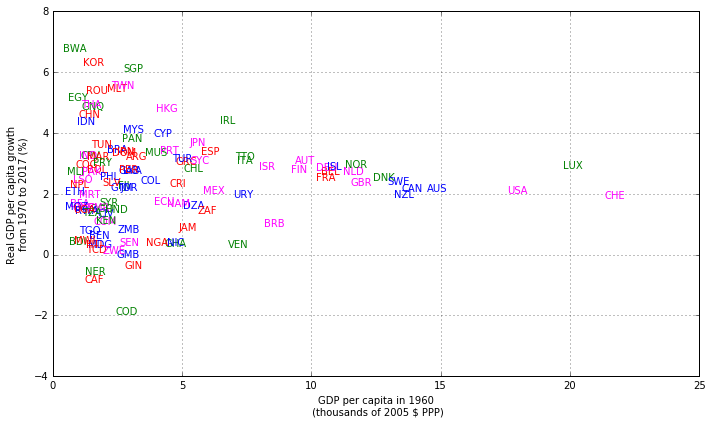

In [6]:
# 4. Plot for website
data = pd.read_csv('../csv/cross_country_income_per_capita.csv',index_col='year')
income60 = data.iloc[0]/1000
growth = 100*((data.iloc[-1]/data.iloc[0])**(1/(len(data.index)-1))-1)

fig = plt.figure(figsize=(10, 6)) 
ax = fig.add_subplot(1,1,1)
colors = ['red','blue','magenta','green']

plt.scatter(income60,growth,s=0.0001)
for i, txt in enumerate(data.columns):
    
    ax.annotate(txt[-3:], (income60[i],growth[i]),fontsize=10,color = colors[np.mod(i,4)])
ax.grid()
# ax.set_xscale('log')
ax.set_xlabel('GDP per capita in 1960\n (thousands of 2011 $ PPP)')
ax.set_ylabel('Real GDP per capita growth\nfrom 1970 to '+str(years[-1])+ ' (%)')
ax.set_xlim([0,25])

fig.tight_layout()
plt.savefig('../png/fig_GDP_GDP_Growth_site.png',bbox_inches='tight')

In [7]:
#5. Export notebook to python script
runProcs.exportNb('cross_country_income_data')